## <font color='black'> Mounting Libraries and packages </font>

In [11]:
import tensorflow

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import cv2

import os
import time
import pandas as pd
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import MaxPool2D ,ReLU,Lambda,TimeDistributed,Dense, GlobalAveragePooling2D, Dropout,LSTM,Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import time
import pandas as pd
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import MaxPool2D ,ReLU,Lambda,TimeDistributed,Dense, GlobalAveragePooling2D, Dropout,LSTM,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import CSVLogger

import os
import random

import numpy as np
import cv2

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

from PIL import Image, ImageOps
import matplotlib.image as mpimg

from keras.models import model_from_json

In [14]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

## <font color='black'> Collecting dataset </font>

In [7]:
from numpy import load
data=load('data_segmentated.npy')
labels=load('labels_segmentated.npy')

In [8]:
data.shape

(3600, 120, 160)

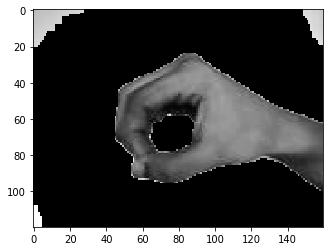

In [9]:
plt.imshow(data[0],cmap='gray')

In [10]:
labels.shape

(3600,)

## <font color='black'> Plotting the dataset </font>

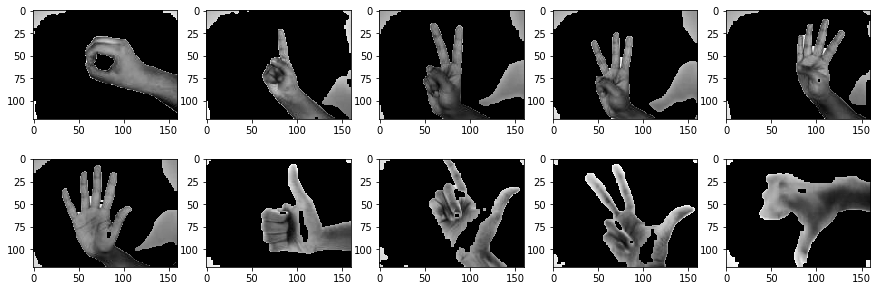

In [11]:

import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 5))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = data[i*360-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='gray')
plt.show()

## <font color='black'> Splitting into train and validation data </font>

In [12]:
from sklearn.model_selection import train_test_split

x=data
y=labels


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=x_train/255
x_test=x_test/255
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

training shape:  (2880, 120, 160) (2880,)
testing shape:  (720, 120, 160) (720,)


In [13]:
# Hot Encoding 

y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

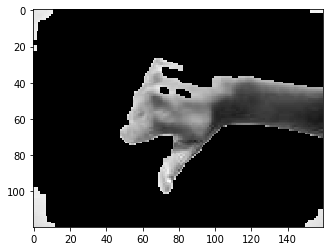

In [14]:
plt.imshow(x_train[0],cmap='gray')

In [15]:
import collections
collections.Counter(y_train)

Counter({9: 293,
         6: 292,
         5: 297,
         3: 301,
         0: 267,
         2: 281,
         1: 287,
         4: 279,
         7: 291,
         8: 292})

## <font color='black'> Augmentation </font>

## <font color='black'> Model </font>

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=(120,160,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 116, 156, 32)      832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 152, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 76, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 76, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 74, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 36, 64)        0

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## <font color='black'> Augmentation </font>

In [19]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'Train_Segmentated',
        color_mode='grayscale',
        target_size=(120, 160),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'Test_Segmentated',
         color_mode='grayscale',
        target_size=(120, 160),
        batch_size=32,
        class_mode='categorical')


Found 3240 images belonging to 10 classes.
Found 360 images belonging to 10 classes.


In [20]:
history=model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator)

Epoch 1/20
102/102 [==============================] - ETA: 4:21 - loss: 2.3017 - accuracy: 0.06 - ETA: 3:29 - loss: 2.3870 - accuracy: 0.04 - ETA: 3:19 - loss: 2.3632 - accuracy: 0.07 - ETA: 3:15 - loss: 2.3535 - accuracy: 0.08 - ETA: 3:11 - loss: 2.3395 - accuracy: 0.10 - ETA: 3:08 - loss: 2.3325 - accuracy: 0.10 - ETA: 3:05 - loss: 2.3316 - accuracy: 0.10 - ETA: 3:04 - loss: 2.3271 - accuracy: 0.11 - ETA: 3:04 - loss: 2.3223 - accuracy: 0.12 - ETA: 2:47 - loss: 2.3223 - accuracy: 0.11 - ETA: 2:47 - loss: 2.3189 - accuracy: 0.12 - ETA: 2:47 - loss: 2.3131 - accuracy: 0.14 - ETA: 2:47 - loss: 2.3092 - accuracy: 0.14 - ETA: 2:46 - loss: 2.3072 - accuracy: 0.14 - ETA: 2:45 - loss: 2.3002 - accuracy: 0.15 - ETA: 2:44 - loss: 2.2914 - accuracy: 0.15 - ETA: 2:43 - loss: 2.2887 - accuracy: 0.15 - ETA: 2:42 - loss: 2.2701 - accuracy: 0.16 - ETA: 2:41 - loss: 2.2593 - accuracy: 0.17 - ETA: 2:39 - loss: 2.2453 - accuracy: 0.18 - ETA: 2:38 - loss: 2.2338 - accuracy: 0.18 - ETA: 2:36 - loss: 2.22

102/102 [==============================] - ETA: 3:42 - loss: 1.2703 - accuracy: 0.59 - ETA: 3:33 - loss: 1.2815 - accuracy: 0.56 - ETA: 3:28 - loss: 1.2844 - accuracy: 0.58 - ETA: 3:26 - loss: 1.2950 - accuracy: 0.57 - ETA: 3:24 - loss: 1.3008 - accuracy: 0.57 - ETA: 3:24 - loss: 1.2833 - accuracy: 0.56 - ETA: 3:21 - loss: 1.2801 - accuracy: 0.56 - ETA: 3:21 - loss: 1.3070 - accuracy: 0.55 - ETA: 3:19 - loss: 1.3250 - accuracy: 0.54 - ETA: 3:15 - loss: 1.3222 - accuracy: 0.53 - ETA: 3:13 - loss: 1.3338 - accuracy: 0.53 - ETA: 3:10 - loss: 1.3730 - accuracy: 0.52 - ETA: 3:08 - loss: 1.3904 - accuracy: 0.51 - ETA: 3:07 - loss: 1.3983 - accuracy: 0.49 - ETA: 3:05 - loss: 1.3922 - accuracy: 0.50 - ETA: 3:02 - loss: 1.3734 - accuracy: 0.50 - ETA: 3:00 - loss: 1.3722 - accuracy: 0.50 - ETA: 2:58 - loss: 1.3614 - accuracy: 0.51 - ETA: 2:56 - loss: 1.3720 - accuracy: 0.50 - ETA: 2:54 - loss: 1.3581 - accuracy: 0.51 - ETA: 2:53 - loss: 1.3583 - accuracy: 0.51 - ETA: 2:51 - loss: 1.3546 - accura

102/102 [==============================] - ETA: 3:47 - loss: 1.0261 - accuracy: 0.62 - ETA: 3:34 - loss: 0.8726 - accuracy: 0.67 - ETA: 3:26 - loss: 0.7984 - accuracy: 0.69 - ETA: 3:23 - loss: 0.8279 - accuracy: 0.71 - ETA: 3:20 - loss: 0.8427 - accuracy: 0.69 - ETA: 3:18 - loss: 0.8869 - accuracy: 0.66 - ETA: 3:16 - loss: 0.8887 - accuracy: 0.65 - ETA: 3:14 - loss: 0.8906 - accuracy: 0.65 - ETA: 3:13 - loss: 0.8953 - accuracy: 0.65 - ETA: 3:11 - loss: 0.9493 - accuracy: 0.64 - ETA: 3:09 - loss: 0.9087 - accuracy: 0.66 - ETA: 3:07 - loss: 0.9095 - accuracy: 0.67 - ETA: 3:04 - loss: 0.9050 - accuracy: 0.67 - ETA: 3:02 - loss: 0.9052 - accuracy: 0.67 - ETA: 3:00 - loss: 0.9027 - accuracy: 0.67 - ETA: 2:58 - loss: 0.8692 - accuracy: 0.68 - ETA: 2:56 - loss: 0.8920 - accuracy: 0.67 - ETA: 2:54 - loss: 0.9165 - accuracy: 0.66 - ETA: 2:52 - loss: 0.9272 - accuracy: 0.65 - ETA: 2:50 - loss: 0.9282 - accuracy: 0.65 - ETA: 2:47 - loss: 0.9186 - accuracy: 0.65 - ETA: 2:45 - loss: 0.9275 - accura

102/102 [==============================] - ETA: 3:42 - loss: 0.3048 - accuracy: 0.90 - ETA: 3:25 - loss: 0.6026 - accuracy: 0.76 - ETA: 3:23 - loss: 0.7414 - accuracy: 0.73 - ETA: 3:21 - loss: 0.7541 - accuracy: 0.71 - ETA: 3:22 - loss: 0.7208 - accuracy: 0.72 - ETA: 3:20 - loss: 0.6976 - accuracy: 0.73 - ETA: 3:17 - loss: 0.7261 - accuracy: 0.73 - ETA: 3:14 - loss: 0.7098 - accuracy: 0.73 - ETA: 3:12 - loss: 0.7188 - accuracy: 0.72 - ETA: 3:10 - loss: 0.7123 - accuracy: 0.73 - ETA: 3:08 - loss: 0.7284 - accuracy: 0.73 - ETA: 3:06 - loss: 0.7667 - accuracy: 0.71 - ETA: 3:04 - loss: 0.7519 - accuracy: 0.72 - ETA: 3:02 - loss: 0.7391 - accuracy: 0.73 - ETA: 3:00 - loss: 0.7381 - accuracy: 0.73 - ETA: 2:58 - loss: 0.7281 - accuracy: 0.74 - ETA: 2:56 - loss: 0.7355 - accuracy: 0.74 - ETA: 2:53 - loss: 0.7252 - accuracy: 0.74 - ETA: 2:51 - loss: 0.7094 - accuracy: 0.74 - ETA: 2:50 - loss: 0.7008 - accuracy: 0.75 - ETA: 2:48 - loss: 0.7000 - accuracy: 0.75 - ETA: 2:46 - loss: 0.7042 - accura

102/102 [==============================] - ETA: 3:51 - loss: 0.6819 - accuracy: 0.81 - ETA: 3:37 - loss: 0.7974 - accuracy: 0.81 - ETA: 3:34 - loss: 0.8070 - accuracy: 0.78 - ETA: 3:35 - loss: 0.7745 - accuracy: 0.76 - ETA: 3:35 - loss: 0.6898 - accuracy: 0.78 - ETA: 3:32 - loss: 0.6815 - accuracy: 0.78 - ETA: 3:30 - loss: 0.6506 - accuracy: 0.79 - ETA: 3:28 - loss: 0.6511 - accuracy: 0.78 - ETA: 3:25 - loss: 0.6459 - accuracy: 0.78 - ETA: 3:22 - loss: 0.6357 - accuracy: 0.78 - ETA: 3:20 - loss: 0.6387 - accuracy: 0.78 - ETA: 3:19 - loss: 0.6566 - accuracy: 0.78 - ETA: 3:17 - loss: 0.6437 - accuracy: 0.78 - ETA: 3:14 - loss: 0.6367 - accuracy: 0.78 - ETA: 3:11 - loss: 0.6325 - accuracy: 0.78 - ETA: 3:09 - loss: 0.6456 - accuracy: 0.78 - ETA: 3:06 - loss: 0.6399 - accuracy: 0.79 - ETA: 3:04 - loss: 0.6337 - accuracy: 0.79 - ETA: 3:02 - loss: 0.6298 - accuracy: 0.79 - ETA: 3:00 - loss: 0.6230 - accuracy: 0.79 - ETA: 2:58 - loss: 0.6079 - accuracy: 0.79 - ETA: 2:55 - loss: 0.6010 - accura

102/102 [==============================] - ETA: 3:35 - loss: 0.6111 - accuracy: 0.75 - ETA: 3:25 - loss: 0.5148 - accuracy: 0.79 - ETA: 3:22 - loss: 0.5313 - accuracy: 0.79 - ETA: 3:20 - loss: 0.4686 - accuracy: 0.82 - ETA: 3:18 - loss: 0.4797 - accuracy: 0.82 - ETA: 3:18 - loss: 0.4612 - accuracy: 0.83 - ETA: 3:17 - loss: 0.4875 - accuracy: 0.81 - ETA: 3:14 - loss: 0.4789 - accuracy: 0.81 - ETA: 3:11 - loss: 0.4981 - accuracy: 0.80 - ETA: 3:09 - loss: 0.5146 - accuracy: 0.81 - ETA: 3:07 - loss: 0.5285 - accuracy: 0.80 - ETA: 3:04 - loss: 0.5424 - accuracy: 0.80 - ETA: 3:03 - loss: 0.5465 - accuracy: 0.80 - ETA: 3:01 - loss: 0.5480 - accuracy: 0.80 - ETA: 2:59 - loss: 0.5535 - accuracy: 0.80 - ETA: 2:57 - loss: 0.5393 - accuracy: 0.80 - ETA: 2:55 - loss: 0.5255 - accuracy: 0.81 - ETA: 2:53 - loss: 0.5342 - accuracy: 0.81 - ETA: 2:51 - loss: 0.5347 - accuracy: 0.81 - ETA: 2:49 - loss: 0.5205 - accuracy: 0.81 - ETA: 2:47 - loss: 0.5162 - accuracy: 0.81 - ETA: 2:45 - loss: 0.5160 - accura

102/102 [==============================] - ETA: 3:36 - loss: 0.7441 - accuracy: 0.75 - ETA: 3:22 - loss: 0.6623 - accuracy: 0.75 - ETA: 3:22 - loss: 0.5863 - accuracy: 0.77 - ETA: 3:23 - loss: 0.6029 - accuracy: 0.77 - ETA: 3:20 - loss: 0.6109 - accuracy: 0.77 - ETA: 3:18 - loss: 0.6450 - accuracy: 0.77 - ETA: 3:15 - loss: 0.6201 - accuracy: 0.77 - ETA: 3:13 - loss: 0.5866 - accuracy: 0.78 - ETA: 3:11 - loss: 0.5851 - accuracy: 0.78 - ETA: 3:09 - loss: 0.5863 - accuracy: 0.78 - ETA: 3:07 - loss: 0.5820 - accuracy: 0.78 - ETA: 3:06 - loss: 0.5925 - accuracy: 0.78 - ETA: 3:03 - loss: 0.5812 - accuracy: 0.79 - ETA: 3:01 - loss: 0.5693 - accuracy: 0.79 - ETA: 2:59 - loss: 0.5649 - accuracy: 0.79 - ETA: 2:57 - loss: 0.5621 - accuracy: 0.79 - ETA: 2:55 - loss: 0.5469 - accuracy: 0.79 - ETA: 2:52 - loss: 0.5441 - accuracy: 0.80 - ETA: 2:51 - loss: 0.5430 - accuracy: 0.80 - ETA: 2:49 - loss: 0.5355 - accuracy: 0.80 - ETA: 2:47 - loss: 0.5202 - accuracy: 0.80 - ETA: 2:45 - loss: 0.5124 - accura

102/102 [==============================] - ETA: 3:42 - loss: 0.7117 - accuracy: 0.78 - ETA: 3:32 - loss: 0.4750 - accuracy: 0.82 - ETA: 3:26 - loss: 0.3897 - accuracy: 0.86 - ETA: 3:22 - loss: 0.3378 - accuracy: 0.89 - ETA: 3:18 - loss: 0.3646 - accuracy: 0.88 - ETA: 3:16 - loss: 0.3395 - accuracy: 0.89 - ETA: 3:14 - loss: 0.3441 - accuracy: 0.88 - ETA: 3:11 - loss: 0.3560 - accuracy: 0.88 - ETA: 3:10 - loss: 0.3610 - accuracy: 0.88 - ETA: 3:09 - loss: 0.3624 - accuracy: 0.87 - ETA: 3:07 - loss: 0.4010 - accuracy: 0.86 - ETA: 3:05 - loss: 0.3911 - accuracy: 0.86 - ETA: 3:03 - loss: 0.3840 - accuracy: 0.87 - ETA: 3:00 - loss: 0.4144 - accuracy: 0.85 - ETA: 2:58 - loss: 0.4079 - accuracy: 0.85 - ETA: 2:56 - loss: 0.3953 - accuracy: 0.85 - ETA: 2:54 - loss: 0.4085 - accuracy: 0.85 - ETA: 2:52 - loss: 0.3977 - accuracy: 0.85 - ETA: 2:50 - loss: 0.3987 - accuracy: 0.85 - ETA: 2:48 - loss: 0.4016 - accuracy: 0.85 - ETA: 2:46 - loss: 0.3914 - accuracy: 0.85 - ETA: 2:44 - loss: 0.3917 - accura

102/102 [==============================] - ETA: 3:38 - loss: 0.4622 - accuracy: 0.81 - ETA: 3:20 - loss: 0.3641 - accuracy: 0.85 - ETA: 3:23 - loss: 0.3736 - accuracy: 0.86 - ETA: 3:24 - loss: 0.3384 - accuracy: 0.87 - ETA: 3:21 - loss: 0.3514 - accuracy: 0.86 - ETA: 3:18 - loss: 0.3288 - accuracy: 0.88 - ETA: 3:19 - loss: 0.3305 - accuracy: 0.88 - ETA: 3:18 - loss: 0.3751 - accuracy: 0.87 - ETA: 3:15 - loss: 0.4024 - accuracy: 0.85 - ETA: 3:12 - loss: 0.3911 - accuracy: 0.86 - ETA: 3:10 - loss: 0.3967 - accuracy: 0.86 - ETA: 3:07 - loss: 0.3900 - accuracy: 0.85 - ETA: 3:05 - loss: 0.3911 - accuracy: 0.85 - ETA: 3:02 - loss: 0.3803 - accuracy: 0.86 - ETA: 3:01 - loss: 0.3798 - accuracy: 0.86 - ETA: 2:59 - loss: 0.4063 - accuracy: 0.85 - ETA: 2:57 - loss: 0.4021 - accuracy: 0.85 - ETA: 2:54 - loss: 0.4033 - accuracy: 0.86 - ETA: 2:52 - loss: 0.3947 - accuracy: 0.86 - ETA: 2:50 - loss: 0.4027 - accuracy: 0.85 - ETA: 2:48 - loss: 0.3883 - accuracy: 0.86 - ETA: 2:46 - loss: 0.3902 - accura

102/102 [==============================] - ETA: 3:38 - loss: 0.2891 - accuracy: 0.84 - ETA: 3:20 - loss: 0.3058 - accuracy: 0.85 - ETA: 3:19 - loss: 0.3057 - accuracy: 0.86 - ETA: 3:18 - loss: 0.3250 - accuracy: 0.88 - ETA: 3:18 - loss: 0.3393 - accuracy: 0.88 - ETA: 3:17 - loss: 0.3206 - accuracy: 0.89 - ETA: 3:15 - loss: 0.3227 - accuracy: 0.88 - ETA: 3:12 - loss: 0.3276 - accuracy: 0.88 - ETA: 3:10 - loss: 0.3670 - accuracy: 0.87 - ETA: 3:08 - loss: 0.3464 - accuracy: 0.88 - ETA: 3:05 - loss: 0.3649 - accuracy: 0.88 - ETA: 3:03 - loss: 0.3630 - accuracy: 0.88 - ETA: 3:02 - loss: 0.3549 - accuracy: 0.88 - ETA: 3:00 - loss: 0.3589 - accuracy: 0.88 - ETA: 2:58 - loss: 0.3587 - accuracy: 0.88 - ETA: 2:56 - loss: 0.3483 - accuracy: 0.88 - ETA: 2:54 - loss: 0.3462 - accuracy: 0.88 - ETA: 2:52 - loss: 0.3425 - accuracy: 0.89 - ETA: 2:49 - loss: 0.3403 - accuracy: 0.88 - ETA: 2:47 - loss: 0.3373 - accuracy: 0.88 - ETA: 2:46 - loss: 0.3297 - accuracy: 0.89 - ETA: 2:44 - loss: 0.3329 - accura

102/102 [==============================] - ETA: 3:32 - loss: 0.2042 - accuracy: 0.93 - ETA: 3:23 - loss: 0.1964 - accuracy: 0.92 - ETA: 3:26 - loss: 0.1789 - accuracy: 0.93 - ETA: 3:25 - loss: 0.1980 - accuracy: 0.94 - ETA: 3:21 - loss: 0.2149 - accuracy: 0.93 - ETA: 3:18 - loss: 0.2391 - accuracy: 0.91 - ETA: 3:16 - loss: 0.2665 - accuracy: 0.89 - ETA: 3:13 - loss: 0.2821 - accuracy: 0.89 - ETA: 3:11 - loss: 0.2800 - accuracy: 0.89 - ETA: 3:08 - loss: 0.3165 - accuracy: 0.89 - ETA: 3:07 - loss: 0.3305 - accuracy: 0.88 - ETA: 3:05 - loss: 0.3210 - accuracy: 0.89 - ETA: 3:03 - loss: 0.3266 - accuracy: 0.89 - ETA: 3:01 - loss: 0.3211 - accuracy: 0.89 - ETA: 2:59 - loss: 0.3151 - accuracy: 0.89 - ETA: 2:56 - loss: 0.3029 - accuracy: 0.90 - ETA: 2:54 - loss: 0.3271 - accuracy: 0.89 - ETA: 2:52 - loss: 0.3211 - accuracy: 0.89 - ETA: 2:51 - loss: 0.3220 - accuracy: 0.89 - ETA: 2:48 - loss: 0.3223 - accuracy: 0.89 - ETA: 2:46 - loss: 0.3149 - accuracy: 0.89 - ETA: 2:44 - loss: 0.3075 - accura

102/102 [==============================] - ETA: 3:46 - loss: 0.1041 - accuracy: 0.96 - ETA: 3:33 - loss: 0.2210 - accuracy: 0.93 - ETA: 3:27 - loss: 0.2649 - accuracy: 0.92 - ETA: 3:24 - loss: 0.2189 - accuracy: 0.93 - ETA: 3:21 - loss: 0.2507 - accuracy: 0.91 - ETA: 3:19 - loss: 0.2324 - accuracy: 0.91 - ETA: 3:17 - loss: 0.2471 - accuracy: 0.90 - ETA: 3:14 - loss: 0.2351 - accuracy: 0.91 - ETA: 3:14 - loss: 0.2463 - accuracy: 0.90 - ETA: 3:11 - loss: 0.2498 - accuracy: 0.90 - ETA: 3:09 - loss: 0.2727 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2826 - accuracy: 0.88 - ETA: 3:04 - loss: 0.2735 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2859 - accuracy: 0.89 - ETA: 3:00 - loss: 0.2842 - accuracy: 0.88 - ETA: 2:58 - loss: 0.2724 - accuracy: 0.89 - ETA: 2:56 - loss: 0.2757 - accuracy: 0.89 - ETA: 2:54 - loss: 0.2680 - accuracy: 0.89 - ETA: 2:52 - loss: 0.2678 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2677 - accuracy: 0.89 - ETA: 2:47 - loss: 0.2754 - accuracy: 0.88 - ETA: 2:45 - loss: 0.2702 - accura

102/102 [==============================] - ETA: 3:33 - loss: 0.1794 - accuracy: 0.90 - ETA: 3:23 - loss: 0.1636 - accuracy: 0.92 - ETA: 3:20 - loss: 0.1931 - accuracy: 0.91 - ETA: 3:19 - loss: 0.2472 - accuracy: 0.91 - ETA: 3:16 - loss: 0.2289 - accuracy: 0.91 - ETA: 3:16 - loss: 0.2236 - accuracy: 0.91 - ETA: 3:15 - loss: 0.2374 - accuracy: 0.91 - ETA: 3:13 - loss: 0.2372 - accuracy: 0.91 - ETA: 3:10 - loss: 0.2306 - accuracy: 0.91 - ETA: 3:08 - loss: 0.2397 - accuracy: 0.91 - ETA: 3:05 - loss: 0.2462 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2571 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2492 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2517 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2776 - accuracy: 0.90 - ETA: 2:56 - loss: 0.2799 - accuracy: 0.90 - ETA: 2:53 - loss: 0.2740 - accuracy: 0.90 - ETA: 2:51 - loss: 0.2752 - accuracy: 0.90 - ETA: 2:49 - loss: 0.2803 - accuracy: 0.89 - ETA: 2:47 - loss: 0.2750 - accuracy: 0.90 - ETA: 2:45 - loss: 0.2820 - accuracy: 0.89 - ETA: 2:43 - loss: 0.2876 - accura

102/102 [==============================] - ETA: 3:34 - loss: 0.3192 - accuracy: 0.90 - ETA: 3:23 - loss: 0.2761 - accuracy: 0.92 - ETA: 3:20 - loss: 0.3039 - accuracy: 0.90 - ETA: 3:20 - loss: 0.2856 - accuracy: 0.92 - ETA: 3:20 - loss: 0.2667 - accuracy: 0.92 - ETA: 3:18 - loss: 0.2388 - accuracy: 0.93 - ETA: 3:16 - loss: 0.2301 - accuracy: 0.93 - ETA: 3:14 - loss: 0.2146 - accuracy: 0.93 - ETA: 3:11 - loss: 0.2238 - accuracy: 0.93 - ETA: 3:09 - loss: 0.2150 - accuracy: 0.93 - ETA: 3:06 - loss: 0.2037 - accuracy: 0.93 - ETA: 3:05 - loss: 0.2020 - accuracy: 0.93 - ETA: 3:03 - loss: 0.2147 - accuracy: 0.93 - ETA: 3:00 - loss: 0.2210 - accuracy: 0.93 - ETA: 2:58 - loss: 0.2356 - accuracy: 0.92 - ETA: 2:56 - loss: 0.2263 - accuracy: 0.92 - ETA: 2:54 - loss: 0.2250 - accuracy: 0.92 - ETA: 2:52 - loss: 0.2306 - accuracy: 0.92 - ETA: 2:49 - loss: 0.2333 - accuracy: 0.92 - ETA: 2:48 - loss: 0.2263 - accuracy: 0.92 - ETA: 2:46 - loss: 0.2219 - accuracy: 0.93 - ETA: 2:44 - loss: 0.2212 - accura

102/102 [==============================] - ETA: 3:32 - loss: 0.2080 - accuracy: 0.90 - ETA: 3:32 - loss: 0.1725 - accuracy: 0.92 - ETA: 3:28 - loss: 0.1945 - accuracy: 0.91 - ETA: 3:23 - loss: 0.2691 - accuracy: 0.89 - ETA: 3:20 - loss: 0.2899 - accuracy: 0.89 - ETA: 3:17 - loss: 0.2919 - accuracy: 0.90 - ETA: 3:14 - loss: 0.2811 - accuracy: 0.89 - ETA: 3:12 - loss: 0.2580 - accuracy: 0.91 - ETA: 3:09 - loss: 0.2510 - accuracy: 0.90 - ETA: 3:08 - loss: 0.2593 - accuracy: 0.90 - ETA: 3:06 - loss: 0.2550 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2505 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2419 - accuracy: 0.91 - ETA: 2:59 - loss: 0.2393 - accuracy: 0.91 - ETA: 2:57 - loss: 0.2304 - accuracy: 0.91 - ETA: 2:55 - loss: 0.2255 - accuracy: 0.91 - ETA: 2:53 - loss: 0.2212 - accuracy: 0.91 - ETA: 2:51 - loss: 0.2185 - accuracy: 0.92 - ETA: 2:50 - loss: 0.2232 - accuracy: 0.91 - ETA: 2:48 - loss: 0.2205 - accuracy: 0.92 - ETA: 2:45 - loss: 0.2228 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2315 - accura

102/102 [==============================] - ETA: 3:44 - loss: 0.1211 - accuracy: 0.93 - ETA: 3:24 - loss: 0.0881 - accuracy: 0.95 - ETA: 3:21 - loss: 0.1151 - accuracy: 0.94 - ETA: 3:19 - loss: 0.1111 - accuracy: 0.94 - ETA: 3:17 - loss: 0.1224 - accuracy: 0.93 - ETA: 3:15 - loss: 0.1561 - accuracy: 0.93 - ETA: 3:13 - loss: 0.1576 - accuracy: 0.93 - ETA: 3:12 - loss: 0.1540 - accuracy: 0.92 - ETA: 3:11 - loss: 0.1460 - accuracy: 0.93 - ETA: 3:08 - loss: 0.1623 - accuracy: 0.92 - ETA: 3:06 - loss: 0.1646 - accuracy: 0.92 - ETA: 3:04 - loss: 0.1600 - accuracy: 0.92 - ETA: 3:02 - loss: 0.1624 - accuracy: 0.92 - ETA: 3:00 - loss: 0.1780 - accuracy: 0.92 - ETA: 2:58 - loss: 0.1862 - accuracy: 0.92 - ETA: 2:57 - loss: 0.2058 - accuracy: 0.91 - ETA: 2:55 - loss: 0.1983 - accuracy: 0.92 - ETA: 2:52 - loss: 0.2041 - accuracy: 0.91 - ETA: 2:50 - loss: 0.2238 - accuracy: 0.91 - ETA: 2:48 - loss: 0.2172 - accuracy: 0.92 - ETA: 2:46 - loss: 0.2154 - accuracy: 0.92 - ETA: 2:44 - loss: 0.2085 - accura

102/102 [==============================] - ETA: 3:31 - loss: 0.1073 - accuracy: 0.93 - ETA: 3:25 - loss: 0.0935 - accuracy: 0.95 - ETA: 3:22 - loss: 0.1187 - accuracy: 0.93 - ETA: 3:20 - loss: 0.1211 - accuracy: 0.93 - ETA: 3:18 - loss: 0.1585 - accuracy: 0.92 - ETA: 3:18 - loss: 0.1551 - accuracy: 0.92 - ETA: 3:16 - loss: 0.1864 - accuracy: 0.91 - ETA: 3:14 - loss: 0.2223 - accuracy: 0.91 - ETA: 3:11 - loss: 0.2123 - accuracy: 0.91 - ETA: 3:09 - loss: 0.2141 - accuracy: 0.91 - ETA: 3:07 - loss: 0.2080 - accuracy: 0.91 - ETA: 3:05 - loss: 0.2101 - accuracy: 0.91 - ETA: 3:03 - loss: 0.1988 - accuracy: 0.92 - ETA: 3:01 - loss: 0.2043 - accuracy: 0.91 - ETA: 2:59 - loss: 0.2050 - accuracy: 0.92 - ETA: 2:57 - loss: 0.2057 - accuracy: 0.92 - ETA: 2:55 - loss: 0.2099 - accuracy: 0.91 - ETA: 2:53 - loss: 0.2048 - accuracy: 0.92 - ETA: 2:51 - loss: 0.2021 - accuracy: 0.92 - ETA: 2:49 - loss: 0.2004 - accuracy: 0.92 - ETA: 2:47 - loss: 0.2005 - accuracy: 0.92 - ETA: 2:45 - loss: 0.1979 - accura

102/102 [==============================] - ETA: 3:36 - loss: 0.1426 - accuracy: 0.90 - ETA: 3:19 - loss: 0.1582 - accuracy: 0.92 - ETA: 3:24 - loss: 0.2840 - accuracy: 0.89 - ETA: 3:23 - loss: 0.2683 - accuracy: 0.89 - ETA: 3:20 - loss: 0.2966 - accuracy: 0.88 - ETA: 3:17 - loss: 0.2959 - accuracy: 0.89 - ETA: 3:15 - loss: 0.2756 - accuracy: 0.89 - ETA: 3:12 - loss: 0.2669 - accuracy: 0.89 - ETA: 3:10 - loss: 0.2823 - accuracy: 0.88 - ETA: 3:08 - loss: 0.2891 - accuracy: 0.88 - ETA: 3:06 - loss: 0.2825 - accuracy: 0.88 - ETA: 3:05 - loss: 0.3100 - accuracy: 0.88 - ETA: 3:03 - loss: 0.3057 - accuracy: 0.88 - ETA: 3:00 - loss: 0.3137 - accuracy: 0.87 - ETA: 2:58 - loss: 0.2997 - accuracy: 0.88 - ETA: 2:56 - loss: 0.2846 - accuracy: 0.89 - ETA: 2:54 - loss: 0.2800 - accuracy: 0.89 - ETA: 2:52 - loss: 0.2674 - accuracy: 0.89 - ETA: 2:50 - loss: 0.2641 - accuracy: 0.89 - ETA: 2:48 - loss: 0.2743 - accuracy: 0.89 - ETA: 2:46 - loss: 0.2725 - accuracy: 0.89 - ETA: 2:44 - loss: 0.2678 - accura

102/102 [==============================] - ETA: 3:46 - loss: 0.2972 - accuracy: 0.90 - ETA: 3:32 - loss: 0.2273 - accuracy: 0.92 - ETA: 3:28 - loss: 0.1833 - accuracy: 0.93 - ETA: 3:24 - loss: 0.1833 - accuracy: 0.93 - ETA: 3:21 - loss: 0.1766 - accuracy: 0.93 - ETA: 3:18 - loss: 0.1637 - accuracy: 0.94 - ETA: 3:16 - loss: 0.1693 - accuracy: 0.93 - ETA: 3:13 - loss: 0.1527 - accuracy: 0.94 - ETA: 3:12 - loss: 0.1461 - accuracy: 0.94 - ETA: 3:10 - loss: 0.1852 - accuracy: 0.93 - ETA: 3:08 - loss: 0.1833 - accuracy: 0.93 - ETA: 3:06 - loss: 0.1816 - accuracy: 0.93 - ETA: 3:04 - loss: 0.1906 - accuracy: 0.92 - ETA: 3:01 - loss: 0.1969 - accuracy: 0.92 - ETA: 2:59 - loss: 0.1909 - accuracy: 0.92 - ETA: 2:57 - loss: 0.1835 - accuracy: 0.92 - ETA: 2:56 - loss: 0.1904 - accuracy: 0.92 - ETA: 2:54 - loss: 0.1823 - accuracy: 0.93 - ETA: 2:51 - loss: 0.1810 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1910 - accuracy: 0.93 - ETA: 2:47 - loss: 0.1966 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1916 - accura

102/102 [==============================] - ETA: 3:35 - loss: 0.3614 - accuracy: 0.87 - ETA: 3:22 - loss: 0.2445 - accuracy: 0.90 - ETA: 3:20 - loss: 0.2694 - accuracy: 0.91 - ETA: 3:18 - loss: 0.2425 - accuracy: 0.90 - ETA: 3:17 - loss: 0.2109 - accuracy: 0.91 - ETA: 3:15 - loss: 0.2113 - accuracy: 0.92 - ETA: 3:15 - loss: 0.2011 - accuracy: 0.92 - ETA: 3:13 - loss: 0.1876 - accuracy: 0.92 - ETA: 3:11 - loss: 0.1707 - accuracy: 0.93 - ETA: 3:09 - loss: 0.1815 - accuracy: 0.93 - ETA: 3:07 - loss: 0.1817 - accuracy: 0.92 - ETA: 3:05 - loss: 0.1701 - accuracy: 0.93 - ETA: 3:02 - loss: 0.1681 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1681 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1698 - accuracy: 0.93 - ETA: 2:49 - loss: 0.1715 - accuracy: 0.93 - ETA: 2:47 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:46 - loss: 0.1637 - accuracy: 0.93 - ETA: 2:44 - loss: 0.1602 - accuracy: 0.93 - ETA: 2:42 - loss: 0.1615 - accuracy: 0.93 - ETA: 2:40 - loss: 0.1606 - accuracy: 0.93 - ETA: 2:39 - loss: 0.1567 - accura

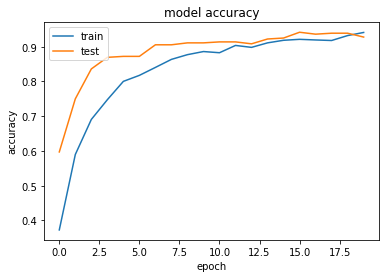

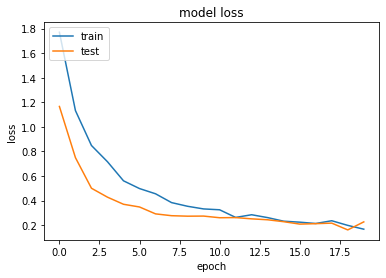

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [23]:
y=history

In [44]:
history.history

{'loss': [1.7704672813415527,
  1.1328037977218628,
  0.8486794829368591,
  0.7164621353149414,
  0.5612086653709412,
  0.4981139898300171,
  0.45558834075927734,
  0.3838382363319397,
  0.35387200117111206,
  0.33233076333999634,
  0.3254193365573883,
  0.2632429301738739,
  0.2850002646446228,
  0.261630654335022,
  0.23249103128910065,
  0.22455741465091705,
  0.21377669274806976,
  0.23618386685848236,
  0.1984158605337143,
  0.16745692491531372],
 'accuracy': [0.3728395104408264,
  0.5898148417472839,
  0.6907407641410828,
  0.7475308775901794,
  0.8003086447715759,
  0.8175926208496094,
  0.8404321074485779,
  0.8635802268981934,
  0.8771604895591736,
  0.8861111402511597,
  0.8827160596847534,
  0.9037036895751953,
  0.8981481194496155,
  0.9111111164093018,
  0.9185185432434082,
  0.9212962985038757,
  0.9194444417953491,
  0.9179012179374695,
  0.9320987462997437,
  0.9410493969917297],
 'val_loss': [1.1662744283676147,
  0.7497676610946655,
  0.5006875991821289,
  0.428013861

In [24]:
y

In [ ]:
model.save('Model_Augmented_h5')

In [42]:
model_pred = model.evaluate(validation_generator)

12/12 [==============================] - ETA: 3s - loss: 0.3430 - accuracy: 0.90 - ETA: 3s - loss: 0.2703 - accuracy: 0.90 - ETA: 2s - loss: 0.2547 - accuracy: 0.90 - ETA: 2s - loss: 0.1952 - accuracy: 0.92 - ETA: 2s - loss: 0.2063 - accuracy: 0.93 - ETA: 1s - loss: 0.2117 - accuracy: 0.93 - ETA: 1s - loss: 0.2478 - accuracy: 0.91 - ETA: 1s - loss: 0.2448 - accuracy: 0.92 - ETA: 0s - loss: 0.2715 - accuracy: 0.91 - ETA: 0s - loss: 0.2533 - accuracy: 0.91 - ETA: 0s - loss: 0.2321 - accuracy: 0.92 - ETA: 0s - loss: 0.2270 - accuracy: 0.92 - 4s 302ms/step - loss: 0.2270 - accuracy: 0.9278


In [45]:
model_pred

[0.22696039080619812, 0.9277777671813965]

In [40]:
pred = model.predict(validation_generator)

In [41]:
k=[]
for i in pred:
    k.append(np.argmax(i))

In [64]:
from numpy import load
x=load('test_segmentated.npy')
y=load('test_labels_segmentated.npy')

In [49]:
x=x[...,np.newaxis]

In [50]:
pred=model.predict(x)

In [51]:
pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [63]:
pred=np.argmax(pred, axis=1)

In [65]:
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y, pred))

accuracy:  0.7425


In [62]:
np.argmax(pred, axis=1)

array([7, 9, 5, 9, 2, 9, 2, 5, 4, 0, 9, 8, 1, 5, 6, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 4, 8, 9, 9, 9, 4, 7, 1, 8, 4, 4, 9, 3, 5, 8, 1, 1, 9, 2,
       9, 0, 5, 0, 4, 6, 7, 3, 1, 9, 0, 5, 5, 0, 4, 4, 6, 7, 1, 4, 0, 6,
       5, 5, 7, 7, 4, 0, 6, 9, 7, 5, 9, 3, 6, 0, 0, 5, 8, 6, 1, 6, 7, 2,
       2, 5, 8, 2, 8, 5, 6, 9, 6, 6, 1, 6, 2, 7, 6, 5, 0, 9, 3, 8, 8, 3,
       5, 2, 9, 7, 2, 6, 7, 8, 9, 4, 2, 0, 5, 9, 4, 8, 8, 5, 6, 7, 3, 9,
       4, 2, 4, 8, 6, 5, 9, 0, 3, 7, 4, 5, 4, 1, 4, 4, 9, 0, 7, 9, 4, 0,
       4, 5, 4, 7, 8, 9, 5, 8, 4, 8, 2, 5, 4, 3, 5, 4, 6, 4, 2, 4, 7, 2,
       5, 1, 0, 0, 5, 4, 8, 5, 6, 7, 7, 5, 7, 4, 4, 4, 7, 2, 8, 5, 8, 5,
       7, 8, 5, 5, 7, 8, 7, 5, 0, 0, 6, 5, 5, 4, 5, 8, 6, 2, 9, 6, 9, 7,
       9, 4, 7, 4, 4, 4, 4, 9, 0, 5, 4, 9, 5, 9, 5, 7, 5, 9, 4, 7, 9, 4,
       1, 5, 0, 7, 8, 8, 6, 7, 3, 6, 4, 7, 1, 9, 5, 2, 6, 5, 7, 0, 0, 0,
       5, 8, 8, 8, 5, 2, 6, 5, 7, 5, 4, 8, 7, 5, 6, 8, 0, 6, 9, 5, 5, 8,
       5, 4, 2, 5, 1, 0, 0, 7, 4, 8, 9, 9, 5, 6, 7,

## <font color='black'> Creating an SVM model</font>

In [38]:
def svm_data(x):
    height=x.shape[2]
    width=x.shape[1]
    size=x.shape[0]
    x=x.reshape(size,height*width)
    x=x/255
    return x

In [39]:
x_train_svm=svm_data(x_train)
x_test_svm=svm_data(x_test)

In [40]:
x_train_svm

array([[0.59607843, 0.6       , 0.60784314, ..., 0.58823529, 0.58431373,
        0.58431373],
       [0.        , 0.        , 0.        , ..., 0.39215686, 0.35686275,
        0.34117647],
       [0.        , 0.        , 0.        , ..., 0.01960784, 0.00392157,
        0.01960784],
       ...,
       [0.        , 0.        , 0.        , ..., 0.1372549 , 0.14117647,
        0.14117647],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65882353, 0.6627451 , 0.6627451 , ..., 0.25490196, 0.25490196,
        0.24705882]])

In [41]:
from sklearn import svm

classifier = svm.SVC(gamma=1e-03)
#fit to the trainin data
classifier.fit(x_train_svm,y_train)

SVC(gamma=0.001)

In [16]:
y_pred=classifier.predict(x_test_svm)

In [18]:
y_pred

array([3, 4, 9, 9, 0, 9, 4, 3, 7, 3, 6, 0, 2, 1, 9, 3, 8, 4, 0, 5, 2, 5,
       2, 1, 3, 1, 3, 1, 7, 8, 2, 1, 0, 4, 8, 6, 3, 2, 3, 2, 7, 8, 8, 0,
       4, 3, 1, 4, 5, 8, 5, 3, 0, 1, 6, 8, 3, 1, 0, 4, 0, 7, 4, 1, 0, 2,
       4, 4, 7, 8, 2, 4, 1, 5, 2, 3, 3, 8, 2, 4, 0, 1, 6, 6, 2, 7, 7, 1,
       6, 3, 1, 0, 1, 7, 9, 3, 1, 1, 3, 3, 5, 3, 0, 9, 2, 2, 7, 8, 1, 0,
       3, 6, 9, 6, 6, 5, 5, 3, 5, 9, 8, 9, 0, 3, 4, 2, 8, 0, 9, 2, 6, 2,
       7, 7, 3, 3, 9, 0, 0, 5, 2, 1, 8, 7, 8, 2, 9, 0, 0, 3, 5, 9, 0, 5,
       8, 0, 2, 1, 4, 8, 8, 7, 2, 2, 7, 3, 6, 6, 9, 8, 8, 5, 3, 2, 8, 4,
       3, 6, 8, 8, 7, 4, 1, 8, 2, 2, 3, 9, 5, 8, 6, 5, 2, 1, 9, 0, 2, 5,
       7, 1, 1, 4, 8, 4, 3, 4, 0, 4, 9, 7, 0, 3, 0, 6, 0, 0, 6, 7, 4, 4,
       1, 8, 5, 5, 6, 4, 8, 0, 3, 3, 9, 6, 4, 2, 2, 2, 4, 6, 4, 2, 7, 9,
       1, 1, 6, 9, 5, 6, 2, 7, 2, 0, 4, 0, 1, 0, 0, 7, 2, 3, 6, 4, 1, 8,
       5, 9, 7, 4, 1, 8, 1, 3, 4, 7, 7, 9, 2, 7, 0, 4, 9, 0, 4, 8, 8, 2,
       9, 1, 8, 9, 5, 5, 4, 9, 9, 9, 3, 2, 5, 0, 3,

In [19]:
#Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8819444444444444


In [20]:
# Precision and recall

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.88      0.93        93
           1       0.83      0.96      0.89        73
           2       0.84      0.87      0.86        79
           3       0.63      0.88      0.73        59
           4       0.89      0.77      0.82        81
           5       0.94      0.95      0.94        63
           6       0.98      0.84      0.90        68
           7       0.89      0.83      0.86        69
           8       0.95      0.90      0.92        68
           9       0.96      0.97      0.96        67

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720




In [21]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[82  5  0  3  0  0  0  0  0  3]
 [ 0 70  0  1  1  0  0  0  1  0]
 [ 0  1 69  9  0  0  0  0  0  0]
 [ 0  0  2 52  4  1  0  0  0  0]
 [ 0  0  1 10 62  3  0  5  0  0]
 [ 0  0  0  1  0 60  1  1  0  0]
 [ 1  6  2  0  2  0 57  0  0  0]
 [ 0  1  6  2  1  0  0 57  2  0]
 [ 0  0  1  5  0  0  0  1 61  0]
 [ 0  1  1  0  0  0  0  0  0 65]]


In [22]:
collections.Counter(y_test)


Counter({3: 59, 4: 81, 9: 67, 0: 93, 7: 69, 6: 68, 2: 79, 8: 68, 5: 63, 1: 73})

## <font color='black'> Prediction on Test set </font>



In [44]:
x_final_test=load('test_segmentated.npy')
y_final_test=load('test_labels_segmentated.npy')


In [45]:
y_final_test

array([7, 0, 5, 2, 2, 9, 2, 5, 3, 0, 9, 1, 1, 3, 1, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 2, 8, 9, 2, 9, 4, 6, 1, 8, 2, 2, 9, 3, 3, 8, 1, 1, 0, 2,
       9, 3, 4, 0, 4, 1, 7, 8, 1, 9, 0, 5, 4, 0, 3, 3, 6, 7, 1, 2, 0, 6,
       5, 5, 1, 7, 3, 0, 1, 9, 6, 5, 9, 4, 6, 0, 0, 5, 8, 6, 1, 6, 7, 2,
       2, 5, 8, 2, 8, 4, 6, 9, 6, 6, 1, 6, 2, 0, 1, 3, 0, 0, 3, 8, 8, 3,
       5, 9, 9, 7, 1, 1, 7, 8, 9, 3, 2, 0, 6, 0, 4, 8, 9, 4, 6, 7, 3, 9,
       4, 2, 4, 8, 6, 5, 9, 0, 3, 7, 3, 5, 4, 1, 2, 4, 9, 0, 7, 9, 3, 0,
       4, 2, 2, 7, 8, 9, 5, 8, 4, 8, 2, 4, 4, 3, 5, 2, 1, 3, 2, 3, 7, 2,
       5, 1, 0, 0, 3, 3, 8, 4, 1, 7, 7, 5, 7, 4, 3, 3, 7, 2, 8, 5, 8, 5,
       7, 8, 4, 5, 7, 8, 7, 3, 0, 0, 6, 4, 5, 2, 4, 8, 6, 2, 9, 6, 9, 7,
       9, 4, 7, 3, 3, 4, 4, 9, 0, 5, 2, 9, 5, 0, 3, 7, 5, 9, 6, 7, 9, 3,
       1, 8, 0, 2, 8, 2, 6, 7, 3, 6, 4, 7, 1, 9, 1, 2, 6, 4, 3, 0, 0, 0,
       4, 3, 8, 8, 5, 2, 1, 5, 7, 7, 4, 1, 7, 5, 6, 8, 0, 6, 9, 2, 5, 8,
       5, 4, 2, 5, 1, 1, 0, 6, 4, 8, 0, 9, 5, 6, 7,

In [46]:
x_svm=svm_data(x_final_test)

In [47]:
x_svm.shape

(400, 19200)

In [48]:
test_pred=classifier.predict(x_svm)

In [49]:
test_pred

array([7, 0, 5, 2, 2, 9, 2, 5, 3, 0, 9, 1, 1, 3, 1, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 2, 8, 9, 2, 9, 4, 3, 1, 8, 2, 2, 9, 3, 3, 8, 1, 1, 0, 2,
       9, 3, 2, 0, 4, 1, 7, 3, 1, 9, 0, 5, 4, 0, 3, 3, 6, 7, 1, 2, 0, 6,
       5, 5, 1, 7, 3, 0, 1, 9, 6, 3, 9, 3, 6, 0, 0, 5, 8, 6, 1, 6, 3, 2,
       2, 5, 8, 2, 8, 5, 6, 9, 6, 6, 1, 6, 2, 3, 1, 3, 0, 0, 3, 8, 8, 3,
       5, 2, 9, 7, 1, 1, 7, 8, 9, 3, 2, 0, 3, 0, 4, 8, 9, 4, 6, 7, 2, 9,
       4, 1, 4, 8, 1, 5, 9, 0, 3, 7, 3, 3, 4, 1, 2, 4, 9, 0, 7, 9, 3, 0,
       4, 2, 2, 7, 8, 9, 5, 8, 4, 8, 2, 4, 4, 0, 5, 2, 1, 3, 2, 3, 7, 1,
       5, 1, 0, 0, 3, 3, 8, 3, 1, 7, 7, 5, 7, 4, 3, 2, 7, 2, 8, 5, 8, 5,
       7, 8, 3, 5, 7, 8, 7, 4, 0, 0, 6, 5, 5, 2, 4, 8, 6, 2, 9, 6, 9, 7,
       9, 4, 7, 3, 3, 4, 4, 9, 0, 5, 2, 9, 5, 0, 2, 1, 5, 9, 2, 7, 9, 3,
       1, 8, 0, 2, 8, 2, 6, 6, 3, 6, 4, 7, 1, 9, 1, 2, 6, 5, 3, 0, 0, 0,
       4, 3, 8, 8, 5, 2, 1, 5, 7, 2, 4, 1, 7, 5, 6, 8, 0, 6, 9, 5, 5, 3,
       5, 4, 2, 5, 1, 1, 0, 2, 4, 8, 0, 9, 5, 6, 7,

In [50]:
y_final_test

array([7, 0, 5, 2, 2, 9, 2, 5, 3, 0, 9, 1, 1, 3, 1, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 2, 8, 9, 2, 9, 4, 6, 1, 8, 2, 2, 9, 3, 3, 8, 1, 1, 0, 2,
       9, 3, 4, 0, 4, 1, 7, 8, 1, 9, 0, 5, 4, 0, 3, 3, 6, 7, 1, 2, 0, 6,
       5, 5, 1, 7, 3, 0, 1, 9, 6, 5, 9, 4, 6, 0, 0, 5, 8, 6, 1, 6, 7, 2,
       2, 5, 8, 2, 8, 4, 6, 9, 6, 6, 1, 6, 2, 0, 1, 3, 0, 0, 3, 8, 8, 3,
       5, 9, 9, 7, 1, 1, 7, 8, 9, 3, 2, 0, 6, 0, 4, 8, 9, 4, 6, 7, 3, 9,
       4, 2, 4, 8, 6, 5, 9, 0, 3, 7, 3, 5, 4, 1, 2, 4, 9, 0, 7, 9, 3, 0,
       4, 2, 2, 7, 8, 9, 5, 8, 4, 8, 2, 4, 4, 3, 5, 2, 1, 3, 2, 3, 7, 2,
       5, 1, 0, 0, 3, 3, 8, 4, 1, 7, 7, 5, 7, 4, 3, 3, 7, 2, 8, 5, 8, 5,
       7, 8, 4, 5, 7, 8, 7, 3, 0, 0, 6, 4, 5, 2, 4, 8, 6, 2, 9, 6, 9, 7,
       9, 4, 7, 3, 3, 4, 4, 9, 0, 5, 2, 9, 5, 0, 3, 7, 5, 9, 6, 7, 9, 3,
       1, 8, 0, 2, 8, 2, 6, 7, 3, 6, 4, 7, 1, 9, 1, 2, 6, 4, 3, 0, 0, 0,
       4, 3, 8, 8, 5, 2, 1, 5, 7, 7, 4, 1, 7, 5, 6, 8, 0, 6, 9, 2, 5, 8,
       5, 4, 2, 5, 1, 1, 0, 6, 4, 8, 0, 9, 5, 6, 7,

In [51]:
#Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_final_test, test_pred))

Accuracy: 0.89


In [52]:
# Precision and recall

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_final_test, test_pred)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.89      0.97      0.93        40
           2       0.78      0.88      0.82        40
           3       0.71      0.85      0.77        40
           4       0.89      0.78      0.83        41
           5       0.90      0.93      0.91        40
           6       0.97      0.88      0.92        40
           7       0.97      0.82      0.89        39
           8       0.97      0.88      0.92        40
           9       1.00      0.97      0.99        40

    accuracy                           0.89       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400




In [53]:
collections.Counter(y_final_test)

Counter({7: 39, 0: 40, 5: 40, 2: 40, 9: 40, 3: 40, 1: 40, 6: 40, 8: 40, 4: 41})

In [45]:
batch_size = 50
image_height=120
image_width=160
train_path = 'Dataset/Train/'     

test_path =  'Dataset/Test/'  
train_datagenerator = ImageDataGenerator(
        shear_range=0.2,
#         zoom_range=0.2,
        horizontal_flip=True,
        rescale=1./255,
vertical_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range=0.3,
    rotation_range=15,
)

test_datagenerator = ImageDataGenerator(rescale=1./255)
train_generator = train_datagenerator.flow_from_directory(train_path,
                                                          target_size = (120, 160),
                                                          color_mode = 'rgb',
                                                          batch_size = batch_size,
                                                          class_mode = 'categorical',
                                                          shuffle = True)


test_generator = test_datagenerator.flow_from_directory(test_path,
                                                        target_size = (120, 160),
                                                        color_mode = 'rgb',
                                                        class_mode = 'categorical',
                                                       shuffle=False
                                                       )

#Load model wothout classifier/fully connected layers
model = tf.keras.applications.VGG16(weights='imagenet',input_shape=(120, 160,3), classes=10,include_top=False)

#for layer in model.layers:
#    layer.trainable = False
model.summary()

flat1 = Flatten()(model.layers[-1].output)

class1 = Dense(1024, activation='relu')(flat1)
# class2 = Dropout(0.2)(class1)
class3 = Dense(512, activation='relu')(class1)
# class4 = Dropout(0.2)(class3)
class5 = Dense(256, activation='relu')(class3)
# class6 = Dropout(0.2)(class5)
class7 = Dense(128, activation='relu')(class5)
# class8 = Dropout(0.2)(class7)
x = class7
output = Dense(10, activation='softmax')(x)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
model.compile(optimizer = keras.optimizers.SGD(learning_rate=keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)),loss='categorical_crossentropy',metrics = ['accuracy'])

Found 3607 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 80, 128)       147584    
__________________________________________

In [50]:
csv_logger = CSVLogger('training_vgg16_rd_forest_digit.log', separator=',', append=False)
history1=model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//batch_size,
        epochs=10,
        validation_data=test_generator,
        validation_steps=test_generator.samples//batch_size,
        callbacks=[csv_logger]
)

Epoch 1/10
 4/72 [>.............................] - ETA: 13:20 - loss: 2.2917 - accuracy: 0.100 - ETA: 18:29 - loss: 2.2685 - accuracy: 0.180 - ETA: 17:39 - loss: 2.2594 - accuracy: 0.160 - ETA: 17:35 - loss: 2.2654 - accuracy: 0.1600

KeyboardInterrupt: 

In [49]:
batch_size

50